## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

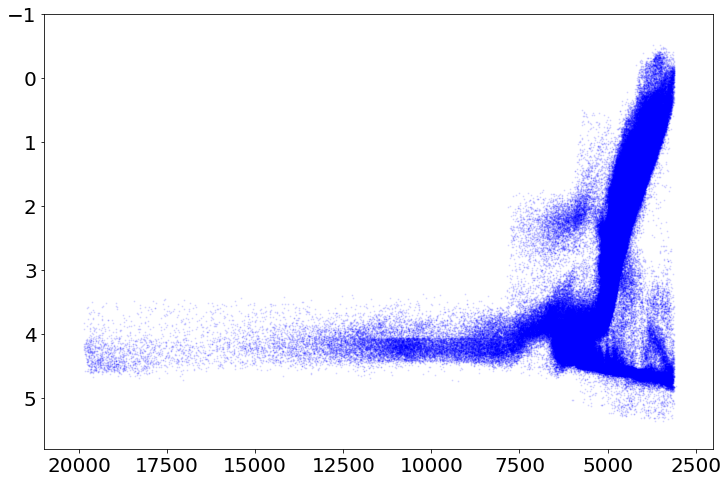

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.030, 0.019
POLY3: -0.041, -0.084, 0.006, 0.021
SIGMOID: -0.871, 25.263, 0.070, -0.055


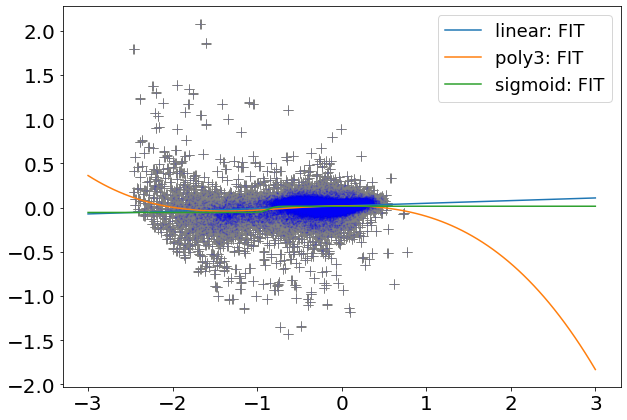

In [4]:
# write your fitting code and plot the results here
# EXAMPLE FIT - DR. FRINCHABOY
# --------------------------------------------
# First Linear, Polnomial, and Cosine Fits
# Select stars only with with  −2 < GLAT < 2   
# 
# 
# I FIT RA & DEC data versus LINEAR, POLY2, AND COSFIT in this example.  
#
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['NI_FE'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 60) & (star['GLAT'] < 999)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H'][cut1]/1000,
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1],
                         star['NI_FE_ERR'][cut1], p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(sigmoid, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H'][cut1]/1000,
                            star['Fe_H'][cut1]/1000,p0=[0,1,-1,0.5])
print(f'SIGMOID: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['NI_FE'][cut1], xerr=(star['Fe_H'][cut1]/1000),
             yerr=(star['NI_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,3,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,sigmoid(x_plot, cfA, cfB, cfC, cfD), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [21]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

mask = np.logical_and(~np.isnan(star['TEFF']), ~np.isnan(star['J'] - star['K']))

star_this_cell = star[mask]

star_t = star[mask]
star_jk = star[mask]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10) & (star['GLAT'] > -999)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star_t[cut1], star_jk[cut1], star_this_cell['TEFF_ERR'][cut1],
                          (np.sqrt(star_this_cell['J_ERR']**2 + star_this_cell['K_ERR']**2))[cut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC = mcFit3(poly2, star_t[cut1], star_jk[cut1], star_this_cell['TEFF_ERR'][cut1],
                         (np.sqrt(star_this_cell['J_ERR']**2 + star_this_cell['K_ERR']**2))[cut1], p0=[1,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}') 

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(logfit, star_t[cut1], star_jk[cut1], star_this_cell['TEFF_ERR'][cut1],
                            (np.sqrt(star_this_cell['J_ERR']**2 + star_this_cell['K_ERR']**2))[cut1],p0=[0,1,-1,0.5])
print(f'LOGFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star_t[cut1],star_jk[cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star_t[cut1]),star_jk[cut1], xerr=(star_t[cut1]/1000),
             yerr=(star_jk[cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,3,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,logfit(x_plot, cfA, cfB, cfC, cfD), label='logfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype((numpy.record, [('APOGEE_ID', 'S30'), ('RA', '>f8'), ('DEC', '>f8'), ('GLON', '>f8'), ('GLAT', '>f8'), ('TEFF', '>f4'), ('TEFF_ERR', '>f4'), ('LOGG', '>f4'), ('LOGG_ERR', '>f4'), ('J', '>f4'), ('J_ERR', '>f4'), ('K', '>f4'), ('K_ERR', '>f4'), ('SNR', '>f4'), ('VHELIO_AVG', '>f4'), ('VERR', '>f4'), ('FE_H', '>f4'), ('FE_H_ERR', '>f4'), ('O_FE', '>f4'), ('O_FE_ERR', '>f4'), ('NI_FE', '>f4'), ('NI_FE_ERR', '>f4'), ('NVISTIS', '>i4'), ('VSCATTER', '>f4'), ('ASPCAPFLAG', '>i8'), ('STARFLAG', '>i8'), ('EXTRATARG', '>i4'), ('GAIA_PARALLAX', '>f4'), ('GAIA_PARALLAX_ERROR', '>f4'), ('GAIA_PMRA', '>f4'), ('GAIA_PMRA_ERROR', '>f4'), ('GAIA_PMDEC', '>f4'), ('GAIA_PMDEC_ERROR', '>f4'), ('GAIA_PHOT_G_MEAN_MAG', '>f4'), ('GAIA_PHOT_BP_MEAN_MAG', '>f4'), ('GAIA_PHOT_RP_MEAN_MAG', '>f4')])), dtype('float64')) -> None

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.000, 0.054
POLY3: -0.000, 0.000, -0.001, 0.080
COSFIT: 0.004, 1.021, -1.914, 0.053


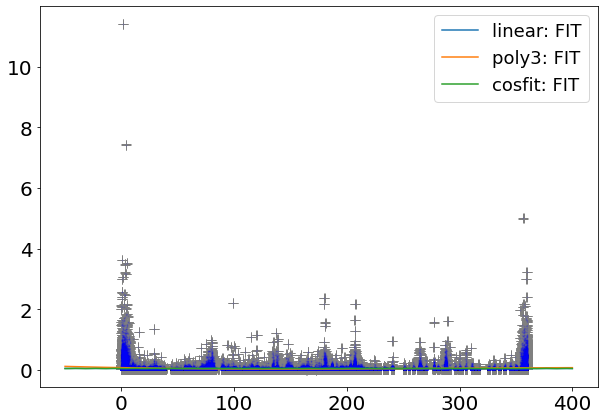

In [9]:
# write you fitting code and plot the results here

# write your fitting code and plot the results here
# EXAMPLE FIT - DR. FRINCHABOY
# --------------------------------------------
# First Linear, Polnomial, and Cosine Fits
# Select stars only with with  −2 < GLAT < 2   
# 
# 
# I FIT RA & DEC data versus LINEAR, POLY2, AND COSFIT in this example.  
#
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['GLON'])]
star = star[~np.isnan(star['VERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -10) & (star['GLAT'] < 10)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                          star['VERR'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                         star['VERR'][cut1]/1000, p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(cosfit, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                            star['VERR'][cut1]/1000,p0=[0,1,-1,0.5])
print(f'COSFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GLON'][cut1],star['VERR'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GLON'][cut1]),star['VERR'][cut1], xerr=(star['GLON'][cut1]/1000),
             yerr=(star['VERR'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-50,400,100) # X-PLOTING FOR FITS
#linear fit
y_plot = np.linspace(-5,5,100)
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,cosfit(x_plot, cfA, cfB, cfC, cfD), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.000, 0.072
POLY3: -0.000, 0.000, 0.001, 0.024


/Users/melinakopischkie/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/jr/s1dy88b904d6ny6sd2k920nh0000gn/T/ipykernel_23352/3932149318.py:20: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x + c) + d


EXPONENTIAL: -0.000, 1.000, -1.000, 0.088


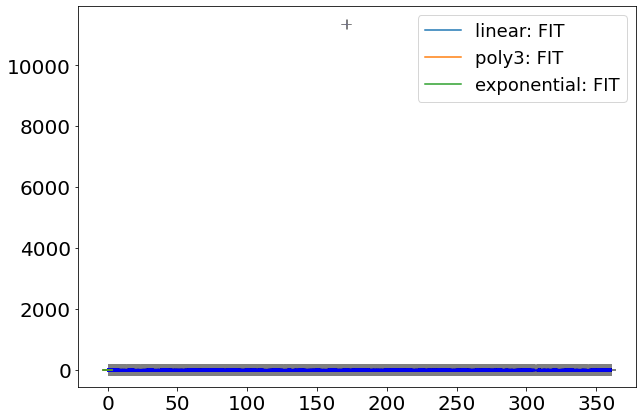

In [12]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['GLON'])]
star = star[~np.isnan(star['VERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] >= 1) & (star['GLAT'] < 999)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                          star['VERR'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                         star['VERR'][cut1]/1000, p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(exponential, star['GLON'][cut1], star['VERR'][cut1], star['GLON'][cut1]/1000,
                            star['VERR'][cut1]/1000,p0=[0,1,-1,0.5])
print(f'EXPONENTIAL: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GLON'][cut1],star['VERR'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GLON'][cut1]),star['VERR'][cut1], xerr=(star['GLON'][cut1]/1000),
             yerr=(star['VERR'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,3,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,exponential(x_plot, cfA, cfB, cfC, cfD), label='exponential: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.012, 1.014
POLY3: 0.000, -0.000, -0.023, 2.750
POLY2: 0.000, -0.064, 4.147


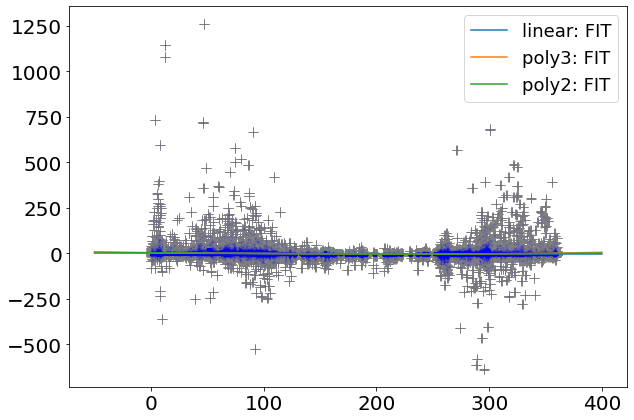

In [13]:
# write you fitting code and plot the results here

# write you fitting code and plot the results here

# write your fitting code and plot the results here
# EXAMPLE FIT - DR. FRINCHABOY
# --------------------------------------------
# First Linear, Polnomial, and Cosine Fits
# Select stars only with with  −2 < GLAT < 2   
# 
# 
# I FIT RA & DEC data versus LINEAR, POLY2, AND COSFIT in this example.  
#
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['RA'])]
star = star[~np.isnan(star['GAIA_PMRA'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -10) & (star['GLAT'] < 10)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['RA'][cut1], star['GAIA_PMRA'][cut1], star['RA'][cut1]/1000,
                          star['GAIA_PMRA'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['RA'][cut1], star['GAIA_PMRA'][cut1], star['RA'][cut1]/1000,
                         star['GAIA_PMRA'][cut1]/1000, p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC = mcFit3(poly2, star['RA'][cut1], star['GAIA_PMRA'][cut1], star['RA'][cut1]/1000,
                            star['GAIA_PMRA'][cut1]/1000,p0=[0,1,-1])
print(f'POLY2: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['RA'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['RA'][cut1]),star['GAIA_PMRA'][cut1], xerr=(star['RA'][cut1]/1000),
             yerr=(star['GAIA_PMRA'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-50,400,100) # X-PLOTING FOR FITS
#linear fit
y_plot = np.linspace(-5,5,100)
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,poly2(x_plot, cfA, cfB, cfC), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.001, -4.456
POLY3: -0.000, 0.000, -0.028, 34.593
POLY2: -0.000, 0.008, -20.084


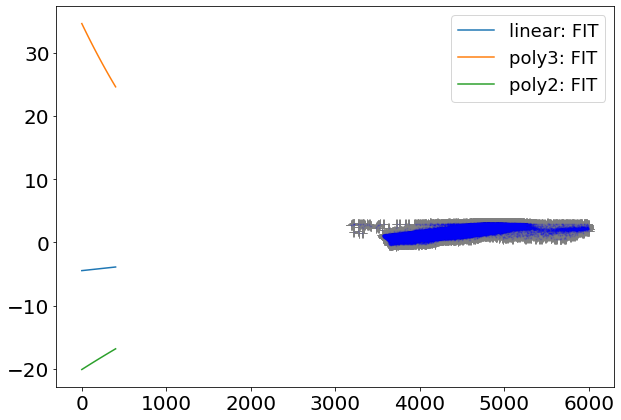

In [16]:
           
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['LOGG'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['TEFF'] < 6000) & (star['LOGG'] < 3)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF'][cut1]/1000,
                          star['LOGG'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF'][cut1]/1000,
                         star['LOGG'][cut1]/1000, p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC = mcFit3(poly2, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF'][cut1]/1000,
                            star['LOGG'][cut1]/1000,p0=[0,0,0])
print(f'POLY2: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut1],star['LOGG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][cut1]),star['LOGG'][cut1], xerr=(star['TEFF'][cut1]/1000),
             yerr=(star['LOGG'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,400,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,poly2(x_plot, cfA, cfB, cfC), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 2.830, -2.754
POLY3: -0.000, 0.036, 1.557, -2.183
POLY2: 0.015, 1.957, -2.342


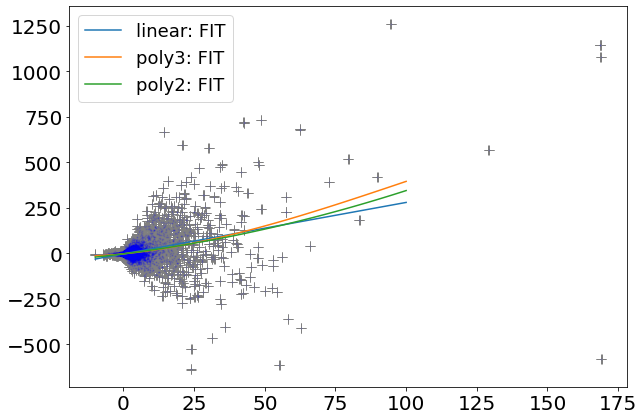

In [18]:
         
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['GAIA_PARALLAX'])]
star = star[~np.isnan(star['GAIA_PMRA'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -10) & (star['GLAT'] < 10)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1], star['GAIA_PARALLAX'][cut1]/1000,
                          star['GAIA_PMRA'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1], star['GAIA_PARALLAX'][cut1]/1000,
                         star['GAIA_PMRA'][cut1]/1000, p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC = mcFit3(poly2, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1], star['GAIA_PARALLAX'][cut1]/1000,
                            star['GAIA_PMRA'][cut1]/1000,p0=[0,1,-1])
print(f'POLY2: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GAIA_PARALLAX'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GAIA_PARALLAX'][cut1]),star['GAIA_PMRA'][cut1], xerr=(star['GAIA_PARALLAX'][cut1]/1000),
             yerr=(star['GAIA_PMRA'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-10,100,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,poly2(x_plot, cfA, cfB, cfC), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()